## Import data

In [73]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Data Mining')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import warnings
import sys
#if not sys.warnoptions:
#    warnings.simplefilter("ignore")
np.random.seed(42)

In [75]:
# settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)

In [76]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [77]:
dataset =pd.read_csv('/content/drive/My Drive/Data Mining/winequality-red.csv', sep=';')

## Cek data

In [78]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [79]:
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Cek data duplikat atau hilang

In [81]:
dataset.duplicated().sum()

240

Ada data duplikat, data duplikat ini di drop

In [82]:
dataset = dataset.drop_duplicates()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [83]:
dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Tidak ada data kosong

In [84]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [85]:
dataset.loc[:, dataset.isnull().any()].columns

Index([], dtype='object')

Setelah dicek, tidak ada data hilang, ada 240 data duplikat (sudah didrop) dan sudah tidak ada nilai kategorikal dalam dataset

In [86]:
## Visualisasi

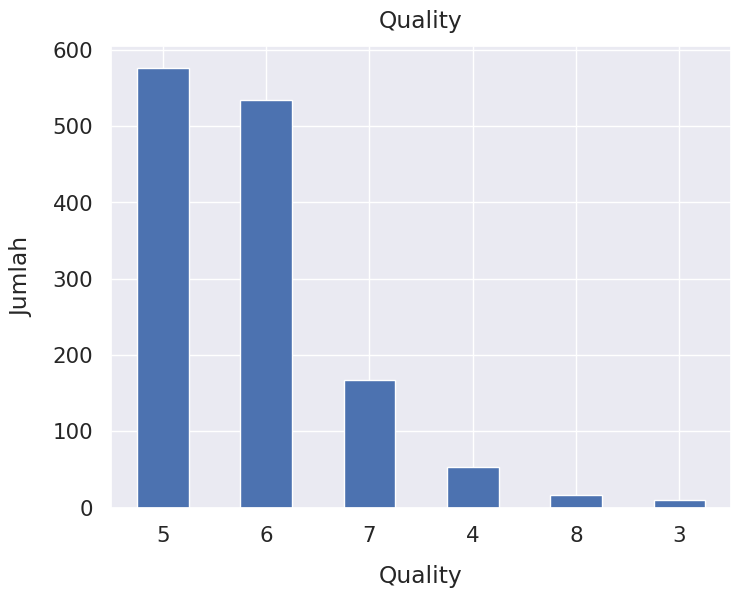

In [87]:
sns.set(font_scale=1.4)
dataset['quality'].value_counts().plot(kind='bar', figsize=(8, 6), rot=0)
plt.xlabel("Quality", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Quality", y=1.02);

## Korelasi

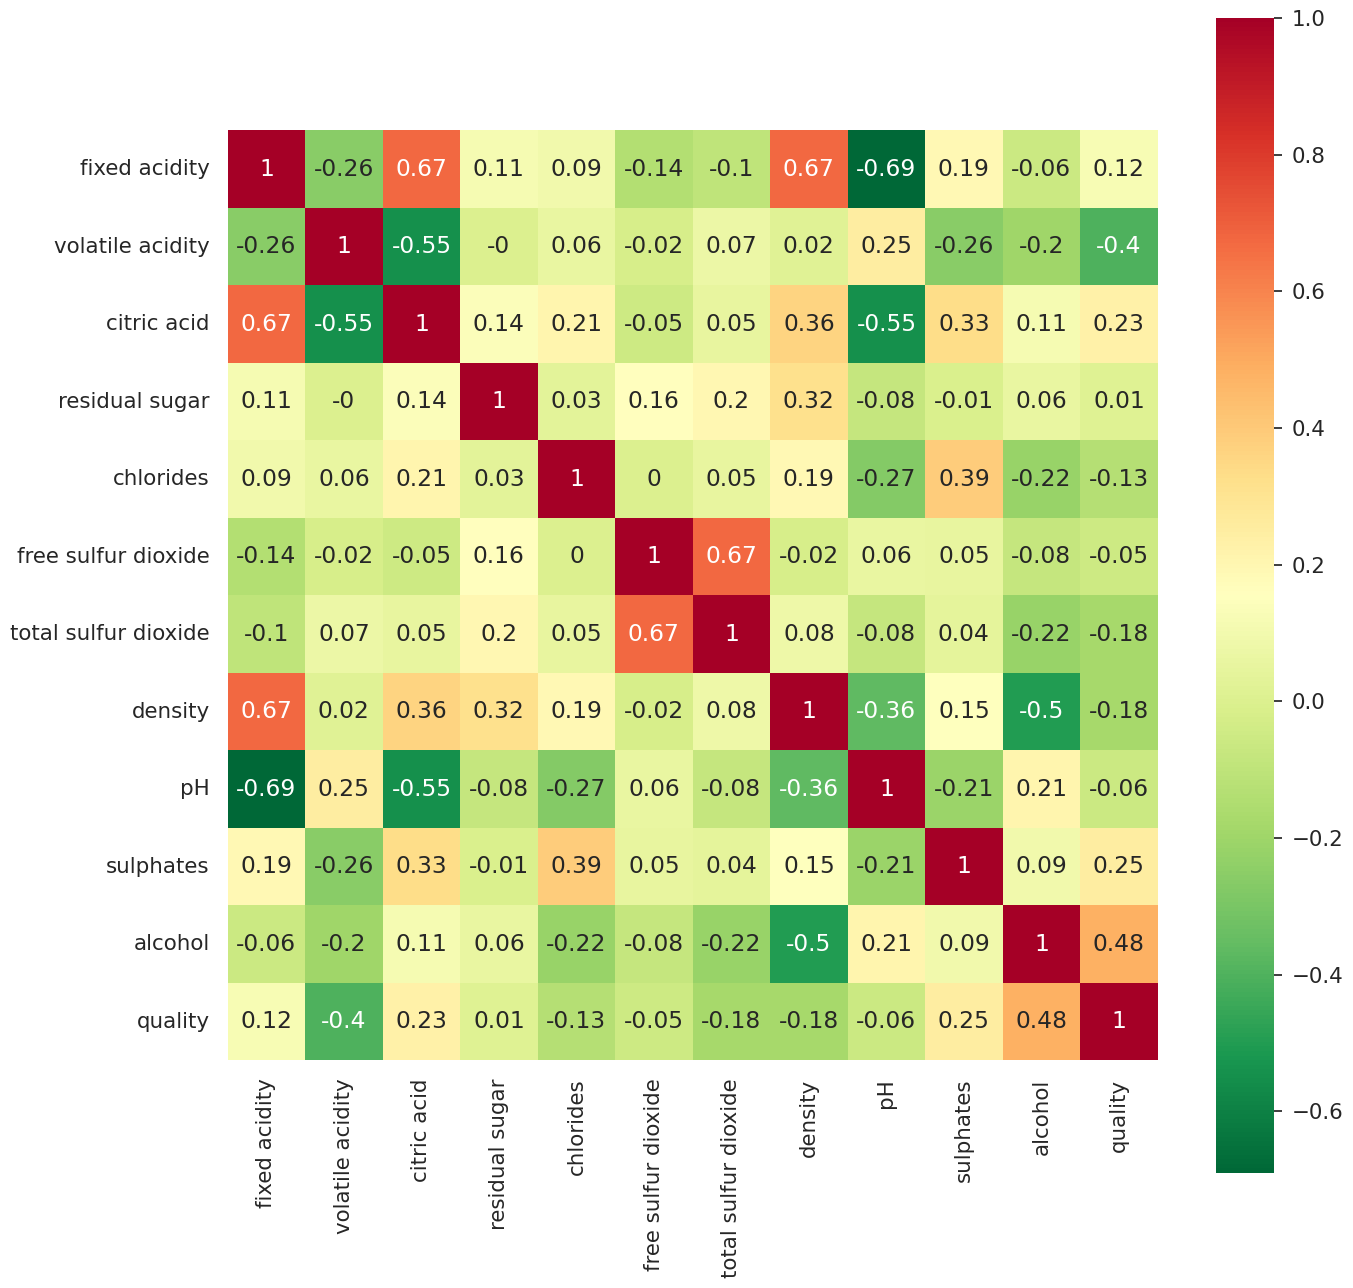

In [88]:
correlation = dataset.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

Dari korelasi dapat dilihat, korelasi paling besar dengan fitur quality adalah tingkat alkoholnya, diikuti sulphates

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

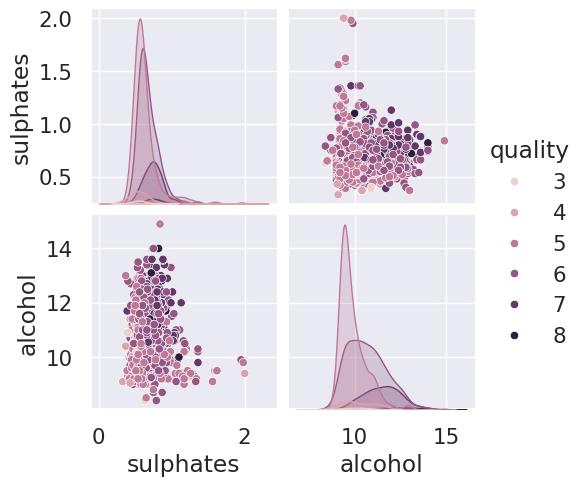

In [109]:
#Plotting following features
To_Plot = [ "quality", "sulphates", "alcohol"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(dataset[To_Plot], hue= "quality")
#Taking hue
plt.show()

In [110]:
import pandas as pd
from scipy import stats

#specify the column you want to analyze for outliers (e.g., 'age')
column_name = 'alcohol'

#method 2 : IQR(Interquartile Range) Method
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)
IQR = Q3-Q1

#define lower and upper bounds for outliers
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

#identify outliers based on the bounds
outliners_iqr = dataset[(dataset[column_name]<lower_bound) | (dataset[column_name]>upper_bound)]

print("\n Outliners using IQR Method : ")
print(outliners_iqr)

print("\n")


 Outliners using IQR Method : 
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
142             5.2              0.34         0.00             1.8      0.050   
467             8.8              0.46         0.45             2.6      0.065   
588             5.0              0.42         0.24             2.0      0.060   
652            15.9              0.36         0.65             7.5      0.096   
821             4.9              0.42         0.00             2.1      0.048   
1114            5.0              0.40         0.50             4.3      0.046   
1132            7.4              0.36         0.34             1.8      0.075   
1228            5.1              0.42         0.00             1.8      0.044   
1269            5.5              0.49         0.03             1.8      0.044   
1270            5.0              0.38         0.01             1.6      0.048   
1475            5.3              0.47         0.11             2.2      0.048

In [112]:
dataset.shape

(1359, 12)

In [114]:
dataset = dataset.drop(outliners_iqr.index)

In [115]:
dataset.shape

(1347, 12)

Korelasi baru setelah data outlier dihapus

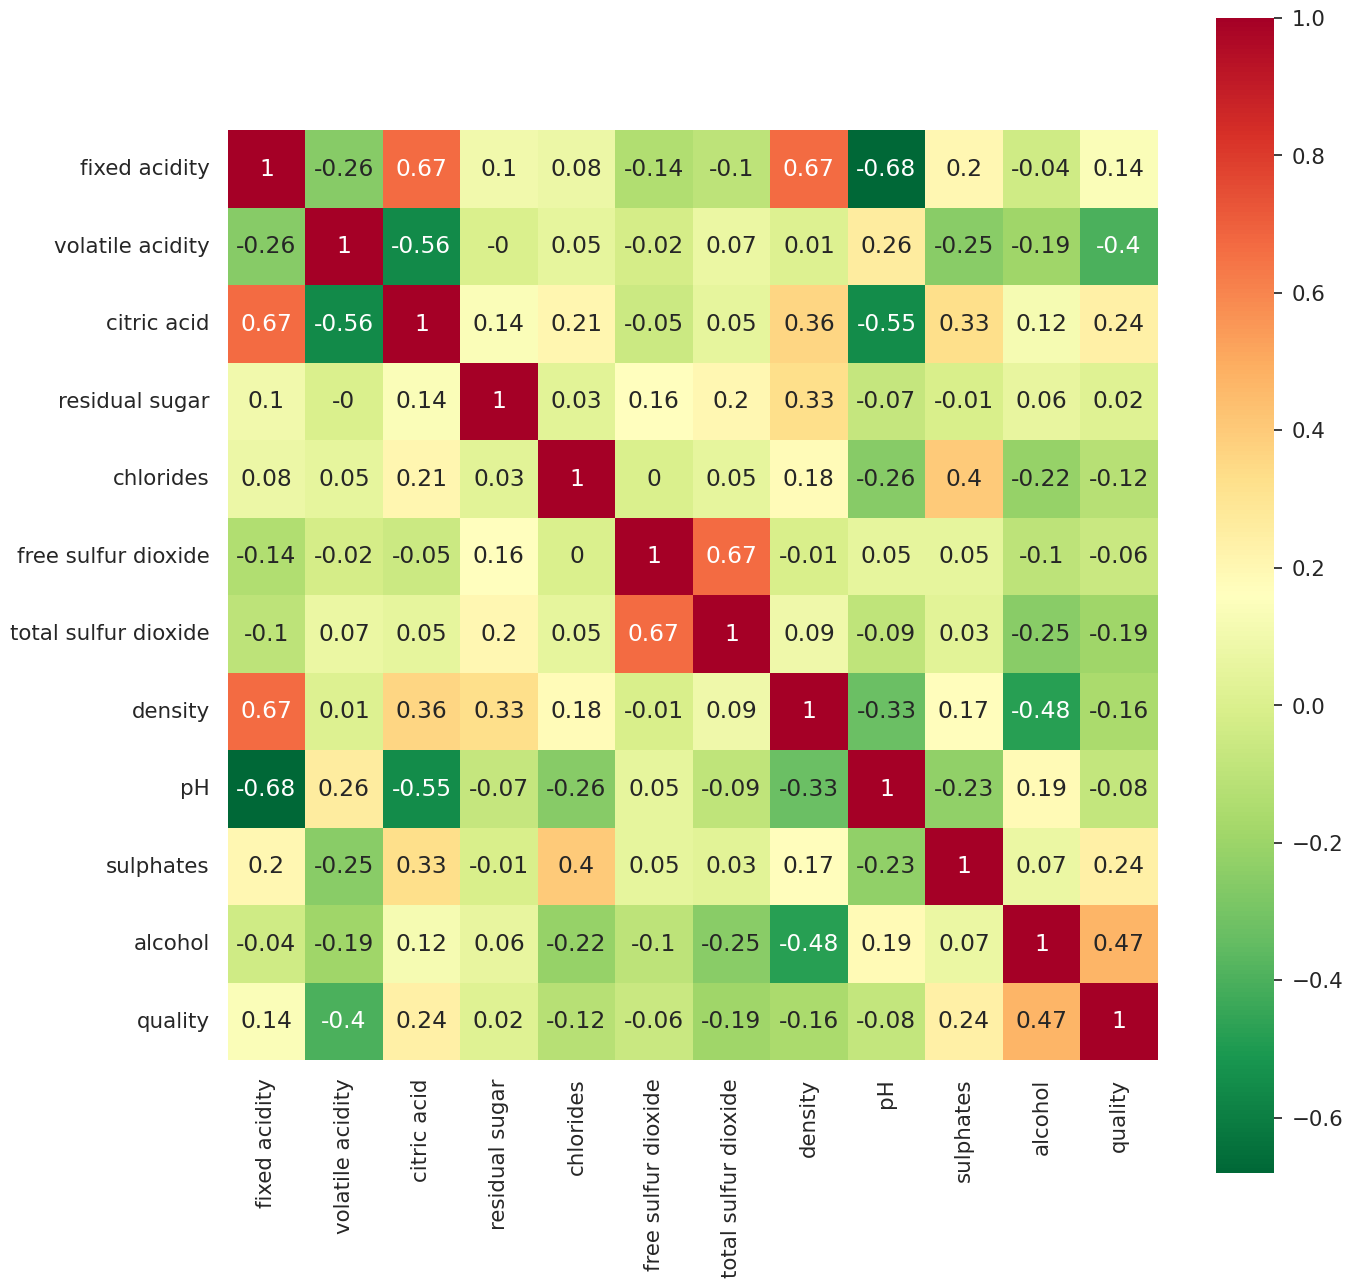

In [118]:
correlation = dataset.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

In [119]:
ds = dataset.copy()

In [120]:
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [121]:
scaled_ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.541155,0.924231,-1.398802,-0.461279,-0.250886,-0.463918,-0.378882,0.577911,1.319542,-0.571033,-0.967673,-0.751415
1,-0.307503,1.905656,-1.398802,0.057557,0.193883,0.873782,0.608118,0.028405,-0.704635,0.131630,-0.581135,-0.751415
2,-0.307503,1.251373,-1.193810,-0.164801,0.072582,-0.081718,0.219300,0.138307,-0.312859,-0.044036,-0.581135,-0.751415
3,1.678539,-1.365763,1.471090,-0.461279,-0.271103,0.109382,0.398754,0.687812,-0.965819,-0.453922,-0.581135,0.472474
4,-0.541155,0.706136,-1.398802,-0.535398,-0.271103,-0.272818,-0.199427,0.577911,1.319542,-0.571033,-0.967673,-0.751415


In [122]:
scaled_ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.347000e+03,1.347000e+03,1.347000e+03,1.347000e+03,1.347000e+03,1.347000e+03,1.347000e+03,1.347000e+03,1.347000e+03,1.347000e+03,1.347000e+03,1.347000e+03
mean,-2.110001e-16,4.800252e-16,1.688001e-16,-3.349626e-16,3.798001e-16,-7.385002e-17,2.110001e-17,8.988603e-15,-1.149950e-15,-2.426501e-16,-1.287100e-15,-4.220001e-17
std,1.000371e+00,1.000371e+00,1.000371e+00,1.000371e+00,1.000371e+00,1.000371e+00,1.000371e+00,1.000371e+00,1.000371e+00,1.000371e+00,1.000371e+00,1.000371e+00
min,-2.176719e+00,-2.238141e+00,-1.398802e+00,-1.202473e+00,-1.544759e+00,-1.419418e+00,-1.216336e+00,-3.669768e+00,-3.708252e+00,-1.917802e+00,-1.934020e+00,-3.199191e+00
25%,-7.163941e-01,-7.660027e-01,-8.863217e-01,-4.612790e-01,-3.721866e-01,-8.461176e-01,-7.377907e-01,-6.310015e-01,-6.393387e-01,-6.295878e-01,-8.710388e-01,-7.514146e-01
50%,-2.490901e-01,-5.719519e-02,-6.635238e-02,-2.389208e-01,-1.902357e-01,-2.728176e-01,-2.592454e-01,-1.555505e-02,1.362152e-02,-2.197015e-01,-2.912311e-01,4.724735e-01
75%,5.102790e-01,5.970887e-01,8.048650e-01,5.755670e-02,5.236548e-02,4.915824e-01,4.735272e-01,5.971439e-01,6.012857e-01,3.658504e-01,6.751152e-01,4.724735e-01
max,4.248712e+00,5.722312e+00,3.726006e+00,9.618956e+00,1.056508e+01,5.364633e+00,7.247934e+00,3.814500e+00,4.584343e+00,7.860914e+00,2.994346e+00,2.920250e+00


In [123]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [124]:
#Let's check the Hopkins measure
hopkin_avg = []
for i in range(0,100):
    a = hopkins(scaled_ds)
    hopkin_avg.append(a)

np.array(hopkin_avg).mean()

0.8677251230999586

In [125]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["PC1","PC2", "PC3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,1347.0,0.0,1.771552,-5.163819,-1.324618,-0.188613,1.108222,8.186989
PC2,1347.0,0.0,1.495377,-5.327165,-1.022711,-0.087916,1.027183,4.080720
PC3,1347.0,0.0,1.277308,-3.459148,-0.885280,-0.110499,0.755670,7.613258


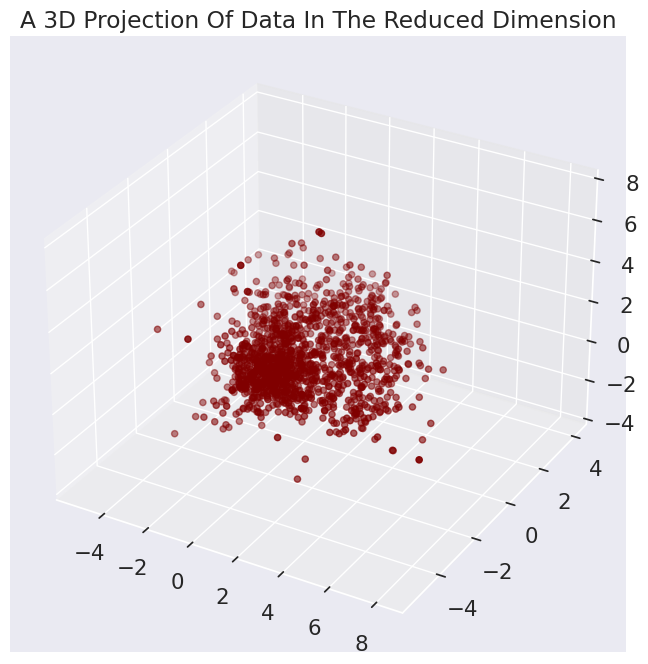

In [126]:
x =PCA_ds["PC1"]
y =PCA_ds["PC2"]
z =PCA_ds["PC3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


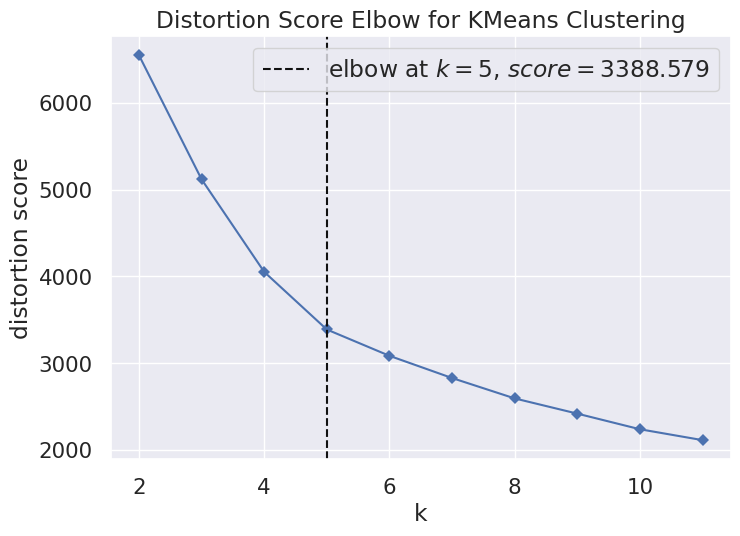

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [127]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(n_init=10), k=(2,12), timings=False)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [128]:
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
dataset["Clusters"]= yhat_AC

In [130]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,3


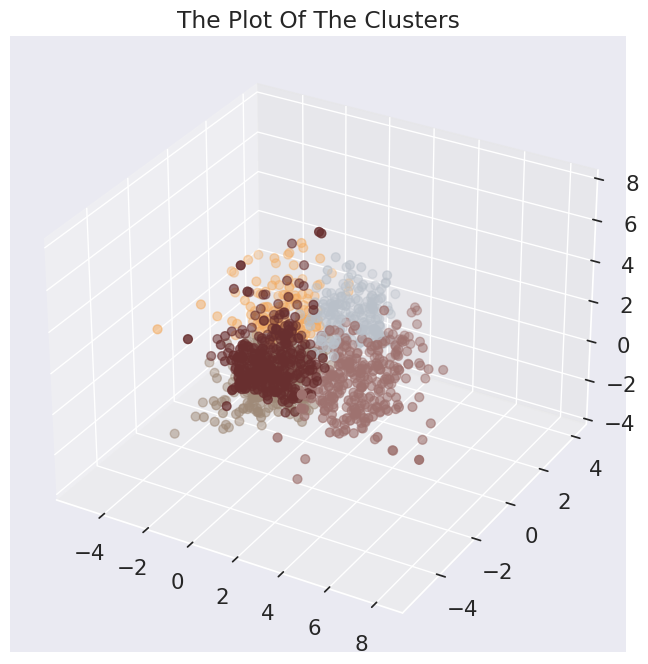

In [131]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

<ipython-input-133-b1d31ae93d86>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=dataset["Clusters"], palette= pal)


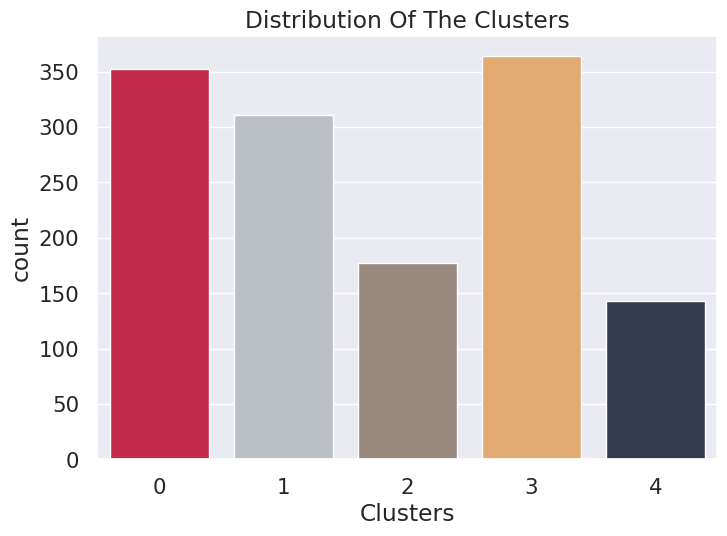

In [133]:
pal = ["#dc143c","#B9C0C9", "#9F8A78","#F3AB60", "#2f3854"]
pl = sns.countplot(x=dataset["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

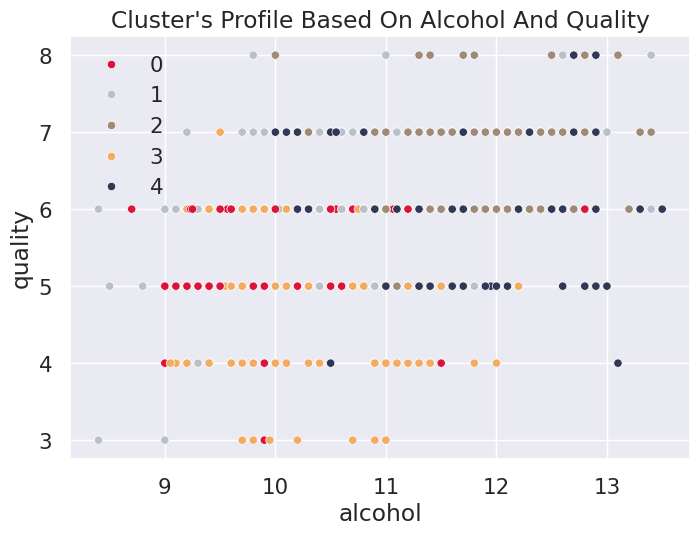

In [136]:
pl = sns.scatterplot(data = dataset,x=dataset["alcohol"], y=dataset["quality"],hue=dataset["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Alcohol And Quality")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 88.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 82.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 75.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 65.7% of the points cannot be plac

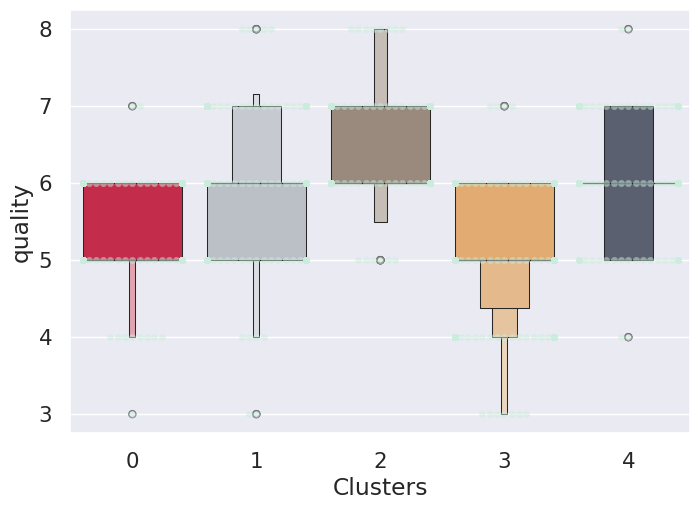

In [143]:
plt.figure()
pl=sns.swarmplot(x=dataset["Clusters"], y=dataset["quality"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=dataset["Clusters"], y=dataset["quality"], palette=pal)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-149-0a8d99e8d849>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(x=dataset["Clusters"], y=dataset["alcohol"], palette=pal)
/usr/local/lib/python3.10/dist-packages/se

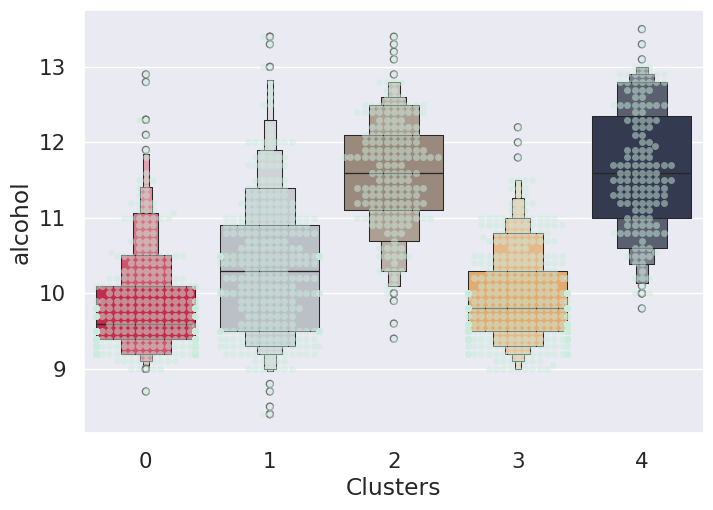

In [149]:
plt.figure()
pl=sns.swarmplot(x=dataset["Clusters"], y=dataset["alcohol"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=dataset["Clusters"], y=dataset["alcohol"], palette=pal)
plt.show()

In [154]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1347 non-null   float64
 1   volatile acidity      1347 non-null   float64
 2   citric acid           1347 non-null   float64
 3   residual sugar        1347 non-null   float64
 4   chlorides             1347 non-null   float64
 5   free sulfur dioxide   1347 non-null   float64
 6   total sulfur dioxide  1347 non-null   float64
 7   density               1347 non-null   float64
 8   pH                    1347 non-null   float64
 9   sulphates             1347 non-null   float64
 10  alcohol               1347 non-null   float64
 11  quality               1347 non-null   int64  
 12  Clusters              1347 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 147.3 KB


In [155]:
Personal = ["alcohol", "sulphates", "citric acid"]

<Figure size 800x550 with 0 Axes>

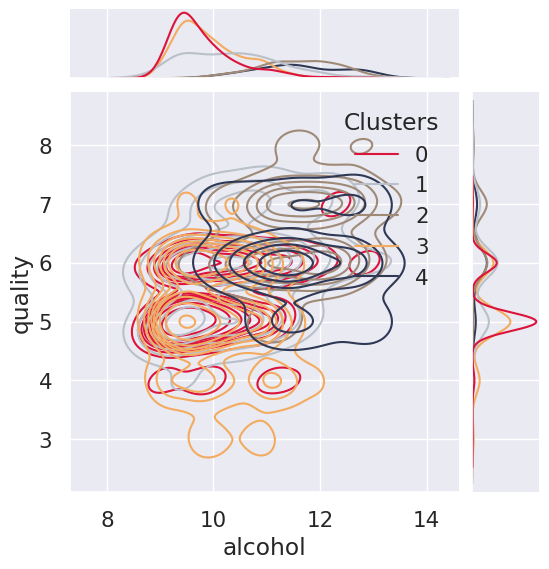

<Figure size 800x550 with 0 Axes>

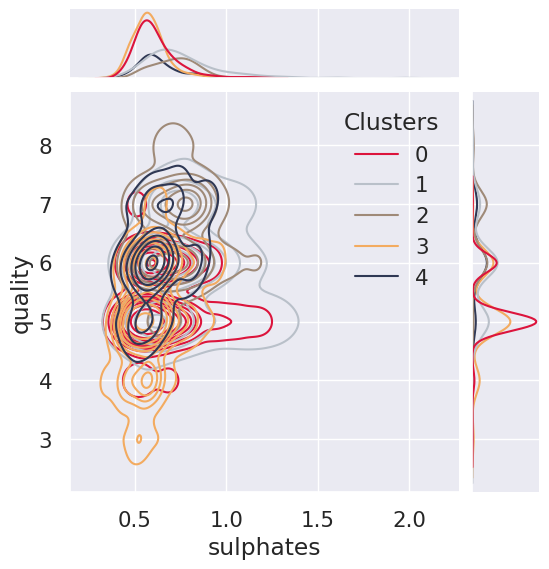

<Figure size 800x550 with 0 Axes>

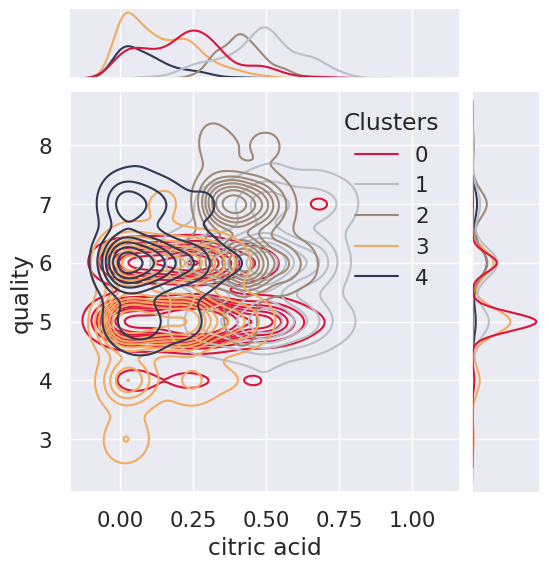

In [157]:
for i in Personal:
    plt.figure()
    sns.jointplot(x=dataset[i], y=dataset["quality"], hue =dataset["Clusters"], kind="kde", palette=pal)
    plt.show()

 Didapat klasifikasi tiap kluster

 Cluster 0 : Kualitas berkisar di angka 5, tertinggi 6. Tingkat alkoholnya termasuk rendah, kebanyakan sekitar 8-10. Sulphates diangka 0.6 dan citric acidnya kebanyakan diangka 0.25

 Cluster 1 : Kualitasnya kebanyakan berkisar di angka 5 sampai 7. Tingkat alkoholnya bervariasi, di angka 7-11. Sulphates termasuk rendah, yaitu kebanyakan angka 0.8 dan citric acid kebanyakan sekitar 0.5. Citric acid lah yang membedakan antara cluster 0 dan 1

 Cluster 2 : Kualitasnya adalah yang paling tinggi dibanding cluster lain, kebanyakan bernilai 6-7, dan beberapa mencapai 8. Tingkat alkoholnya kebanyakan diangka 11-12, sulphates diangka 0.8, dan citric acid sekitar 0.40

 Cluster 3 : Distribusi cluster 3 adalah yang paling banyak dibanding cluster lainnya. Kualitas paling rendah pun masuk di cluster ini, namun kebanyakan kualitasnya berkisar di angka 5, tertinggi 6. Tingkat alkoholnya kebanyakan diangka 9, sulphates diangka 0.6, dan citric acid diangka sekitar 0.05

 Cluster 4 : Distribusi cluster 4 adalah yang paling rendah dibanding cluster lainnya. Kualitas cluster 4 cukup merata dan termasuk tinggi yaitu antara 5-7. Tingkat alkoholnya kebanyakan diangka 11-13, sulphates sekitar angka 0.8, dan citric acid 0.05